In [2]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs
import xesmf as xe
from scipy.interpolate import griddata
from xmip.preprocessing import rename_cmip6
import matplotlib
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import gridspec

In [3]:
toa_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2_truncated.nc')
toa_control.load()

toa_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_historical_2x2_trunc.nc')
toa_hist.load()

surface_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_piControl_interp.nc')
surface_control.load()

surface_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp.nc')
surface_hist.load()

horiz_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_piControl_2x2_trunc.nc')
horiz_control.load()

horiz_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_hist_2x2_trunc.nc')
horiz_hist.load()

ocean_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control_yearlymean.nc')
ocean_control.load()

ocean_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist.nc')
ocean_hist.load()

vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 9.05317347e-03,  5.35726221e-03,  3.90954921e-03, ...,
         1.37608778e-02,  1.27784014e-02,  1.16651980e-02],
       [ 1.62603296e-02,  1.84076093e-02,  1.68463495e-02, ...,
         2.34749150e-02,  2.32172329e-02,  2.24996507e-02],
       [ 1.72343142e-02,  1.73817184e-02,  1.67526975e-02, ...,
         1.50780585e-02,  1.46754114e-02,  1.46230198e-02],
       ...,
       [-2.22924957e-03, -1.80104235e-03, -1.62051118e-03, ...,
        -1.75005000e-03, -2.10483326e-03, -2.04990618e-03],
       [-6.93217677e-04, -1.27934688e-03, -1.30213355e-03, ...,
        -7.43095938e-04, -8.93206510e-04, -9.83634265e-04],
       [ 4.50923544e-04, -8.85086847e-05,  6.49775393e-05, ...,
        -5.63950336e-04, -4.56162205e-04, -3.77876189e-04]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [5]:
ocean_control

<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ]],

        [[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
...
         [ -356.38271079,  -345.74942028,  -331.39597424, ...,
           -310.34597308,  -319.64420364,  -339.5478826 ],
         [ -255.65484372,  -250.39242472,  -248.98653281, ...,
           -249.42839884,  -249.07636164,  -251.92673461],
         [ -192.44680098,  -193.31578306,  -191.46137076, ...,
           -176.30600723,  -181.54757968,  -186.9968345 ]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [ -995.65156175, -1013.51256652, -1034.95047171, ...,
           -865.92792177,  -907.23768459,  -942.42080462],
         [-1059.8408603 , -1081.56269674, -1100.29880793, ...,
           -967.56903885,  -991.50370283, -1017.64702363],
         [-1061.68897011, -1078.63715039, -1096.56693545, ...,
           -977.56150249,  -999.88750142, -1026.38954593]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [3]:
ocean_control_new = ocean_control.sel(name=['GFDL-CM4', 'GFDL-ESM4', 'CNRM-CM6-1', 'GISS-E2-1-G', 'BCC-CSM2-MR',
       'CNRM-ESM2-1', 'BCC-ESM1', 'IPSL-CM6A-LR'])
ocean_control_new

<xarray.DataArray (time: 1500, name: 8, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-5.43331559e+02, -5.36866323e+02, -5.32192432e+02, ...,
          -6.05828234e+02, -5.61448208e+02, -5.70624360e+02],
         [-5.74672215e+02, -5.62671032e+02, -5.42285178e+02, ...,
          -5.81327002e+02, -5.92680000e+02, -5.76999114e+02],
         [-4.91587893e+02, -4.96484682e+02, -4.88513489e+02, ...,
          -5.15594366e+02, -5.38108794e+02, -5.18289721e+02]],

        [[-3.74643045e+00, -3.75031473e+00, -3.74674783e+00, ...,
          -3.73144773e+00, -3.73536782e+00, -3.74422688e+00],
         [-3.69580341e+00, -3.69812613e+00, -3.70849944e+00, ...,
          -3.67012154e+00, -3.66773976e+00, -3.69199380e+00],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-5.58307785e+02, -5.74227172e+02, -5.20893121e+02, ...,
          -2.98934765e+02, -3.16064444e+02, -3.99807490e+02],
         [-8.01198412e+02, -7.83911254e+02, -7.63148522e+02, ...,
          -4.08524368e+02, -5.09068615e+02, -6.21454081e+02],
         [-7.37130216e+02, -7.36861823e+02, -7.26877340e+02, ...,
          -6.45812341e+02, -6.89915176e+02, -7.22568816e+02]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'BCC-ESM1' 'IPSL-CM6A-LR'

In [6]:
toa_control

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[ -36.71150756,  -36.54298704,  -36.33610696, ...,
           -37.38284098,  -37.20380278,  -36.99700632],
         [ -38.26714412,  -37.84095571,  -37.39639549, ...,
           -40.08008474,  -39.55886911,  -39.16305471],
         [ -41.73647855,  -41.19594878,  -40.66258   , ...,
           -43.8332355 ,  -43.39299072,  -42.8394849 ],
         ...,
         [-157.2955542 , -157.20398975, -157.24631113, ...,
          -157.04223199, -157.12361213, -157.20145457],
         [-157.91162539, -157.93890508, -157.92696253, ...,
          -158.0758101 , -158.08202094, -157.97277022],
         [-158.18000831, -158.15537339, -158.11918551, ...,
          -158.34951912, -158.36058747, -158.20792706]],

        [[ -72.54225605,  -72.23584524,  -71.96492355, ...,
           -73.75649012,  -73.41867717,  -73.11533206],
         [ -74.15452931,  -73.55173268,  -73.10056357, ...,
           -76.46964449,  -75.84088912,  -75.23099848],
         [ -76.72662193,  -75.94243471,  -75.26338409, ...,
           -80.29527136,  -79.42623765,  -78.51133988],
...
         [-181.9854744 , -182.0359375 , -182.0664711 , ...,
          -181.23973236, -181.47349167, -181.69258041],
         [-180.29500732, -180.20698242, -180.02695847, ...,
          -179.96253586, -180.02453613, -180.0849884 ],
         [-178.66772766, -178.66780319, -178.65922165, ...,
          -178.66353989, -178.66515732, -178.66641846]],

        [[ -30.78044434,  -30.51520538,  -30.28674316, ...,
           -31.84877777,  -31.58058167,  -31.31312256],
         [ -30.54637909,  -30.50502014,  -30.49138641, ...,
           -32.6575119 ,  -32.05069733,  -31.44662476],
         [ -32.58455505,  -31.80276947,  -31.22492981, ...,
           -35.05920105,  -34.13252258,  -33.24951935],
         ...,
         [-168.92062836, -168.77332535, -168.6551857 , ...,
          -169.71805649, -169.61350632, -169.4986412 ],
         [-167.35431976, -166.99015579, -166.8127861 , ...,
          -168.09862213, -167.9463501 , -167.79469986],
         [-166.81827316, -166.76327591, -166.71251297, ...,
          -167.04034882, -166.98452377, -166.92889099]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR/piControl/r1i1p1f1/rlut_Amon_BCC-CSM2...

In [4]:
toa_control = toa_control.to_dataset('name').rename_vars({'BCC-CSM2-MR/piControl/r1i1p1f1/rlut_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc':'BCC-CSM2-MR',
                                                          'BCC-ESM1/piControl/r1i1p1f1/rlut_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc':'BCC-ESM1',
                                                          'CNRM-CM6-1/piControl/r1i1p1f2/rlut_Amon_CNRM-CM6-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-CM6-1',
                                                          'CNRM-ESM2-1/piControl/r1i1p1f2/rlut_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-ESM2-1',
                                                          'GISS-E2-1-G/piControl/r101i1p1f1/rlut_Amon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-201412.nc':'GISS-E2-1-G',
                                                          'IPSL-CM6A-LR/piControl/r1i1p1f1/rlut_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc':'IPSL-CM6A-LR',
                                                          'GFDL-CM4/piControl/r1i1p1f1/rlut_Amon_GFDL-CM4_piControl_r1i1p1f1_gr1_015101-065012.nc':'GFDL-CM4',
                                                          'GFDL-ESM4/piControl/r1i1p1f1/rlut_Amon_GFDL-ESM4_piControl_r1i1p1f1_gr1_000101-050012.nc':'GFDL-ESM4'}).to_array('name')
toa_control

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[ -36.71150756,  -36.54298704,  -36.33610696, ...,
           -37.38284098,  -37.20380278,  -36.99700632],
         [ -38.26714412,  -37.84095571,  -37.39639549, ...,
           -40.08008474,  -39.55886911,  -39.16305471],
         [ -41.73647855,  -41.19594878,  -40.66258   , ...,
           -43.8332355 ,  -43.39299072,  -42.8394849 ],
         ...,
         [-157.2955542 , -157.20398975, -157.24631113, ...,
          -157.04223199, -157.12361213, -157.20145457],
         [-157.91162539, -157.93890508, -157.92696253, ...,
          -158.0758101 , -158.08202094, -157.97277022],
         [-158.18000831, -158.15537339, -158.11918551, ...,
          -158.34951912, -158.36058747, -158.20792706]],

        [[ -72.54225605,  -72.23584524,  -71.96492355, ...,
           -73.75649012,  -73.41867717,  -73.11533206],
         [ -74.15452931,  -73.55173268,  -73.10056357, ...,
           -76.46964449,  -75.84088912,  -75.23099848],
         [ -76.72662193,  -75.94243471,  -75.26338409, ...,
           -80.29527136,  -79.42623765,  -78.51133988],
...
         [-181.9854744 , -182.0359375 , -182.0664711 , ...,
          -181.23973236, -181.47349167, -181.69258041],
         [-180.29500732, -180.20698242, -180.02695847, ...,
          -179.96253586, -180.02453613, -180.0849884 ],
         [-178.66772766, -178.66780319, -178.65922165, ...,
          -178.66353989, -178.66515732, -178.66641846]],

        [[ -30.78044434,  -30.51520538,  -30.28674316, ...,
           -31.84877777,  -31.58058167,  -31.31312256],
         [ -30.54637909,  -30.50502014,  -30.49138641, ...,
           -32.6575119 ,  -32.05069733,  -31.44662476],
         [ -32.58455505,  -31.80276947,  -31.22492981, ...,
           -35.05920105,  -34.13252258,  -33.24951935],
         ...,
         [-168.92062836, -168.77332535, -168.6551857 , ...,
          -169.71805649, -169.61350632, -169.4986412 ],
         [-167.35431976, -166.99015579, -166.8127861 , ...,
          -168.09862213, -167.9463501 , -167.79469986],
         [-166.81827316, -166.76327591, -166.71251297, ...,
          -167.04034882, -166.98452377, -166.92889099]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [5]:
surface_control = surface_control.to_dataset('name').rename_vars({'BCC-CSM2-MR/piControl/r1i1p1f1/hfls_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc':'BCC-CSM2-MR',
                                                                  'BCC-ESM1/piControl/r1i1p1f1/hfls_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc':'BCC-ESM1',
                                                                  'CESM2-WACCM/piControl/r1i1p1f1/hfls_Amon_CESM2-WACCM_piControl_r1i1p1f1_gn_000101-049912.nc':'CESM2-WACCM',
                                                                  'CNRM-CM6-1/piControl/r1i1p1f2/hfls_Amon_CNRM-CM6-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-CM6-1',
                                                                  'CNRM-ESM2-1/piControl/r1i1p1f2/hfls_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-ESM2-1',
                                                                  'GISS-E2-1-G/piControl/r101i1p1f1/hfls_Amon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-201412.nc':'GISS-E2-1-G',
                                                                  'IPSL-CM6A-LR/piControl/r1i1p1f1/hfls_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc':'IPSL-CM6A-LR',
                                                                  'GFDL-CM4/piControl/r1i1p1f1/hfls_Amon_GFDL-CM4_piControl_r1i1p1f1_gr1_015101-065012.nc':'GFDL-CM4',
                                                                  'GFDL-ESM4/piControl/r1i1p1f1/hfls_Amon_GFDL-ESM4_piControl_r1i1p1f1_gr1_000101-050012.nc':'GFDL-ESM4'}).to_array('name')
surface_control

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 3.39850302e+00,  3.41417246e+00,  3.45564645e+00, ...,
           3.26545729e+00,  3.27783883e+00,  3.32447948e+00],
         [ 3.28054698e+00,  3.29991967e+00,  3.30187870e+00, ...,
           3.25308862e+00,  3.28090054e+00,  3.26411404e+00],
         [ 4.05409673e+00,  3.99146260e+00,  3.91367162e+00, ...,
           3.93799453e+00,  4.09078838e+00,  4.11297579e+00],
         ...,
         [-3.03136781e+01, -3.01690631e+01, -3.05290376e+01, ...,
          -2.71065312e+01, -2.80005614e+01, -2.87211936e+01],
         [-2.87204652e+01, -2.92860922e+01, -3.01703797e+01, ...,
          -2.72294478e+01, -2.71159994e+01, -2.71639947e+01],
         [-2.64169938e+01, -2.61577167e+01, -2.62717127e+01, ...,
          -2.78791483e+01, -2.70144323e+01, -2.70226429e+01]],

        [[-1.77046449e+00, -1.78380866e+00, -1.86195850e+00, ...,
          -1.55690938e+00, -1.58058143e+00, -1.65905673e+00],
         [-1.73856327e+00, -1.82117826e+00, -1.87870931e+00, ...,
          -1.56793132e+00, -1.63132377e+00, -1.64435299e+00],
         [-2.35685349e+00, -2.30634801e+00, -2.31745261e+00, ...,
          -2.10030796e+00, -2.23765094e+00, -2.31238928e+00],
...
         [-4.12004921e+01, -4.16000320e+01, -4.08972321e+01, ...,
          -3.67821884e+01, -3.76696243e+01, -3.85909019e+01],
         [-3.76136894e+01, -3.83689163e+01, -3.89362183e+01, ...,
          -3.68359726e+01, -3.70287552e+01, -3.72182953e+01],
         [-3.60778816e+01, -3.60573830e+01, -3.60510521e+01, ...,
          -3.61414474e+01, -3.61282425e+01, -3.61133522e+01]],

        [[ 1.06452133e+01,  1.06054977e+01,  1.05820847e+01, ...,
           1.07948074e+01,  1.07587433e+01,  1.07218307e+01],
         [ 1.02828903e+01,  1.06112442e+01,  1.07531891e+01, ...,
           1.00353378e+01,  1.00266724e+01,  1.00183624e+01],
         [ 9.98862762e+00,  9.73443909e+00,  9.64264679e+00, ...,
           9.84324188e+00,  9.39447021e+00,  9.01401978e+00],
         ...,
         [-4.65505783e+01, -4.73075455e+01, -4.80323677e+01, ...,
          -3.93636360e+01, -4.12918701e+01, -4.32426682e+01],
         [-3.88982155e+01, -3.87834625e+01, -3.88026314e+01, ...,
          -3.73384537e+01, -3.78218536e+01, -3.82949722e+01],
         [-3.69558975e+01, -3.69983612e+01, -3.70232773e+01, ...,
          -3.67733414e+01, -3.68208046e+01, -3.68671371e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [6]:
surface_control_new = surface_control.sel(name=['GFDL-CM4', 'GFDL-ESM4', 'CNRM-CM6-1', 'GISS-E2-1-G', 'BCC-CSM2-MR',
       'CNRM-ESM2-1', 'BCC-ESM1', 'IPSL-CM6A-LR'])
surface_control_new

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[ 7.50981750e+00,  7.49343872e+00,  7.47607422e+00, ...,
           7.57808075e+00,  7.56064606e+00,  7.54335785e+00],
         [ 7.83282776e+00,  7.93383179e+00,  7.91912079e+00, ...,
           7.95302277e+00,  7.86563873e+00,  7.77911835e+00],
         [ 7.65447235e+00,  7.35915222e+00,  7.16876221e+00, ...,
           7.47460175e+00,  7.12242126e+00,  6.83535919e+00],
         ...,
         [-4.39144501e+01, -4.53465607e+01, -4.67609673e+01, ...,
          -3.53126068e+01, -3.65444870e+01, -3.79622108e+01],
         [-4.18658005e+01, -4.22909546e+01, -4.22493439e+01, ...,
          -3.81115761e+01, -3.89865494e+01, -3.98543190e+01],
         [-3.55676422e+01, -3.58135803e+01, -3.60570717e+01, ...,
          -3.45694695e+01, -3.48211212e+01, -3.50714455e+01]],

        [[-2.71842728e+00, -2.70825882e+00, -2.68919754e+00, ...,
          -2.76462402e+00, -2.75226974e+00, -2.74041901e+00],
         [-2.42506180e+00, -2.45203705e+00, -2.42504120e+00, ...,
          -2.35530548e+00, -2.37500763e+00, -2.39354630e+00],
         [-2.10747757e+00, -2.15673828e+00, -2.16802216e+00, ...,
          -2.35157852e+00, -2.44108963e+00, -2.50042191e+00],
...
         [-2.85851175e+01, -2.84472454e+01, -2.78953314e+01, ...,
          -3.12416554e+01, -3.07950952e+01, -3.02612708e+01],
         [-3.12657506e+01, -3.07895907e+01, -3.03470509e+01, ...,
          -3.45373500e+01, -3.31393596e+01, -3.24956798e+01],
         [-3.01757768e+01, -3.02210608e+01, -2.97375892e+01, ...,
          -3.24138118e+01, -3.18493816e+01, -3.14307708e+01]],

        [[ 3.74643045e+00,  3.75031473e+00,  3.74674783e+00, ...,
           3.73144773e+00,  3.73536782e+00,  3.74422688e+00],
         [ 3.69580341e+00,  3.69812613e+00,  3.70849944e+00, ...,
           3.67012154e+00,  3.66773976e+00,  3.69199380e+00],
         [ 3.27375958e+00,  3.28432103e+00,  3.31729593e+00, ...,
           3.41304605e+00,  3.36862854e+00,  3.32006600e+00],
         ...,
         [-2.52504839e+01, -2.49623161e+01, -2.49785688e+01, ...,
          -2.94937056e+01, -2.78297501e+01, -2.63180247e+01],
         [-2.88505986e+01, -2.92364234e+01, -2.76625393e+01, ...,
          -3.19465492e+01, -3.08307186e+01, -3.11334738e+01],
         [-3.12816717e+01, -3.12991602e+01, -3.14521916e+01, ...,
          -3.20618550e+01, -3.22517037e+01, -3.20690707e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'BCC-ESM1' 'IPSL-CM6A-LR'

In [26]:
horiz_control

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[ 40.11001058,  39.95715949,  39.7917534 , ...,  40.64829827,
           40.4816416 ,  40.3214858 ],
         [ 41.5476911 ,  41.14087537,  40.69827419, ...,  43.33317336,
           42.83976965,  42.42716875],
         [ 45.79057528,  45.18741138,  44.57625162, ...,  47.77123003,
           47.4837791 ,  46.95246069],
         ...,
         [126.98187609, 127.03492663, 126.71727354, ..., 129.93570076,
          129.12305069, 128.48026093],
         [129.19116015, 128.65281287, 127.75658284, ..., 130.84636229,
          130.9660215 , 130.80877553],
         [131.76301454, 131.99765669, 131.84747281, ..., 130.47037082,
          131.34615519, 131.18528419]],

        [[ 70.77179156,  70.45203658,  70.10296505, ...,  72.19958074,
           71.83809574,  71.45627533],
         [ 72.41596603,  71.73055442,  71.22185426, ...,  74.90171317,
           74.20956535,  73.58664549],
         [ 74.36976844,  73.6360867 ,  72.94593149, ...,  78.1949634 ,
           77.18858671,  76.1989506 ],
...
         [148.63142883, 148.98506052, 149.68058009, ..., 144.61184519,
          145.12011379, 146.2512031 ],
         [145.33609743, 145.81250218, 146.2975417 , ..., 141.7881719 ,
          142.97540112, 143.9546816 ],
         [146.76857156, 146.74294423, 147.255029  , ..., 144.33245078,
          144.92404567, 145.45384272]],

        [[ 35.9771624 ,  35.86278069,  35.73725818, ...,  36.47886094,
           36.3497268 ,  36.23675149],
         [ 37.49116626,  37.15747269,  36.91979485, ...,  38.63806714,
           38.37883836,  38.10262825],
         [ 39.25144922,  38.89455643,  38.49470347, ...,  40.73189427,
           40.36625726,  40.04514645],
         ...,
         [159.23546377, 159.75363606, 159.88684538, ..., 153.96140407,
          155.69982848, 157.51644148],
         [151.66811707, 151.29320834, 152.92154256, ..., 147.55252957,
          149.086844  , 149.03826255],
         [144.9693395 , 145.03104281, 144.88187895, ..., 143.77983905,
          143.66982151, 143.89279592]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR/piControl/r1i1p1f1/hfls_Amon_BCC-CSM2...

In [7]:
horiz_control = horiz_control.to_dataset('name').rename_vars({'BCC-CSM2-MR/piControl/r1i1p1f1/hfls_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc':'BCC-CSM2-MR',
                                                              'BCC-ESM1/piControl/r1i1p1f1/hfls_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc':'BCC-ESM1',
                                                              'CNRM-CM6-1/piControl/r1i1p1f2/hfls_Amon_CNRM-CM6-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-CM6-1',
                                                              'CNRM-ESM2-1/piControl/r1i1p1f2/hfls_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-ESM2-1',
                                                              'GFDL-CM4/piControl/r1i1p1f1/hfls_Amon_GFDL-CM4_piControl_r1i1p1f1_gr1_015101-065012.nc':'GFDL-CM4',
                                                              'GFDL-ESM4/piControl/r1i1p1f1/hfls_Amon_GFDL-ESM4_piControl_r1i1p1f1_gr1_000101-050012.nc':'GFDL-ESM4',
                                                              'GISS-E2-1-G/piControl/r101i1p1f1/hfls_Amon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-201412.nc':'GISS-E2-1-G',
                                                              'IPSL-CM6A-LR/piControl/r1i1p1f1/hfls_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc':'IPSL-CM6A-LR'}).to_array('name')
horiz_control

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[ 40.11001058,  39.95715949,  39.7917534 , ...,  40.64829827,
           40.4816416 ,  40.3214858 ],
         [ 41.5476911 ,  41.14087537,  40.69827419, ...,  43.33317336,
           42.83976965,  42.42716875],
         [ 45.79057528,  45.18741138,  44.57625162, ...,  47.77123003,
           47.4837791 ,  46.95246069],
         ...,
         [126.98187609, 127.03492663, 126.71727354, ..., 129.93570076,
          129.12305069, 128.48026093],
         [129.19116015, 128.65281287, 127.75658284, ..., 130.84636229,
          130.9660215 , 130.80877553],
         [131.76301454, 131.99765669, 131.84747281, ..., 130.47037082,
          131.34615519, 131.18528419]],

        [[ 70.77179156,  70.45203658,  70.10296505, ...,  72.19958074,
           71.83809574,  71.45627533],
         [ 72.41596603,  71.73055442,  71.22185426, ...,  74.90171317,
           74.20956535,  73.58664549],
         [ 74.36976844,  73.6360867 ,  72.94593149, ...,  78.1949634 ,
           77.18858671,  76.1989506 ],
...
         [148.63142883, 148.98506052, 149.68058009, ..., 144.61184519,
          145.12011379, 146.2512031 ],
         [145.33609743, 145.81250218, 146.2975417 , ..., 141.7881719 ,
          142.97540112, 143.9546816 ],
         [146.76857156, 146.74294423, 147.255029  , ..., 144.33245078,
          144.92404567, 145.45384272]],

        [[ 35.9771624 ,  35.86278069,  35.73725818, ...,  36.47886094,
           36.3497268 ,  36.23675149],
         [ 37.49116626,  37.15747269,  36.91979485, ...,  38.63806714,
           38.37883836,  38.10262825],
         [ 39.25144922,  38.89455643,  38.49470347, ...,  40.73189427,
           40.36625726,  40.04514645],
         ...,
         [159.23546377, 159.75363606, 159.88684538, ..., 153.96140407,
          155.69982848, 157.51644148],
         [151.66811707, 151.29320834, 152.92154256, ..., 147.55252957,
          149.086844  , 149.03826255],
         [144.9693395 , 145.03104281, 144.88187895, ..., 143.77983905,
          143.66982151, 143.89279592]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'IPSL-CM6A-LR'

In [8]:
toa_cont_rolling = toa_control.rolling(time=300, center=True).mean('time')
toa_cont_rolling

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [9]:
surface_cont_rolling = surface_control_new.rolling(time=300, center=True).mean('time')
surface_cont_rolling

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'BCC-ESM1' 'IPSL-CM6A-LR'

In [10]:
horiz_cont_rolling = horiz_control.rolling(time=300, center=True).mean('time')
horiz_cont_rolling

<xarray.DataArray (name: 8, time: 1500, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'IPSL-CM6A-LR'

In [11]:
ocean_cont_rolling = ocean_control_new.rolling(time=300, center=True).mean('time')
ocean_cont_rolling

<xarray.DataArray (time: 1500, name: 8, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'BCC-ESM1' 'IPSL-CM6A-LR'

# Covariance of Surface and TOA Radiation

In [12]:
cov_surface_toa = xr.cov(toa_cont_rolling, surface_cont_rolling, dim='time')
cov_surface_toa

<xarray.DataArray (name: 8, lat: 88, lon: 179)>
array([[[ 1.61620618e-04,  8.16869339e-05,  6.18883772e-05, ...,
          2.44568576e-04,  2.22771382e-04,  1.72886634e-04],
        [ 5.47212774e-04,  4.93727272e-04,  4.01599233e-04, ...,
          7.46732855e-04,  7.65297109e-04,  6.88682523e-04],
        [ 6.32549598e-04,  5.19338958e-04,  4.03073050e-04, ...,
          8.65812887e-04,  8.72315778e-04,  7.87362633e-04],
        ...,
        [ 1.29551744e-01,  1.36306098e-01,  1.15930713e-01, ...,
          1.93423383e-01,  1.70987913e-01,  1.43686058e-01],
        [ 4.81489345e-02,  4.70034538e-02,  4.12870282e-02, ...,
          7.58413541e-02,  6.73371169e-02,  5.90915952e-02],
        [-2.15424315e-02, -2.70154818e-02, -2.45189711e-02, ...,
         -4.76816406e-03, -1.59246358e-02, -2.20676299e-02]],

       [[ 7.89611626e-04,  8.21226135e-04,  8.08664540e-04, ...,
          7.16099070e-04,  7.13984098e-04,  7.23739781e-04],
        [ 5.66119621e-04,  5.68825639e-04,  5.59012588e-04, ...,
          5.47878612e-04,  5.39337835e-04,  5.50825034e-04],
        [ 3.38163658e-04,  3.51792444e-04,  3.80879111e-04, ...,
          3.40644014e-04,  3.19929948e-04,  2.65497750e-04],
...
        [-3.53403338e-02, -4.31827636e-02, -4.92562021e-02, ...,
          1.01652849e-01,  8.15395212e-02,  5.68504339e-02],
        [-6.76468893e-03, -7.37124350e-03, -6.76106969e-03, ...,
          1.03639114e-02,  6.66612894e-03,  3.10311839e-03],
        [ 2.64928606e-02,  2.63594046e-02,  2.60667347e-02, ...,
          2.75904071e-02,  2.72282730e-02,  2.69254198e-02]],

       [[-1.66190064e-04, -1.23613374e-04, -1.03523949e-04, ...,
         -3.65288989e-04, -3.11109479e-04, -2.59839633e-04],
        [-7.32455803e-05, -4.26053992e-04, -5.43271318e-04, ...,
         -4.92069039e-04, -2.63056429e-04, -5.90902531e-05],
        [-7.44508082e-04, -3.40411273e-04, -1.76000590e-04, ...,
         -8.33206961e-04, -1.47608953e-04,  3.94058409e-04],
        ...,
        [ 4.42488586e-02,  6.58957644e-02,  9.32502365e-02, ...,
          1.99600370e-01,  1.89625753e-01,  1.68638151e-01],
        [-4.70427604e-03, -7.14918416e-03,  1.05177900e-03, ...,
          2.45628303e-02,  1.88087411e-02,  1.33512976e-02],
        [ 3.13114021e-02,  3.04592815e-02,  3.13401199e-02, ...,
          3.55804186e-02,  3.43843732e-02,  3.32741785e-02]]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [13]:
cov_surface_toa = cov_surface_toa.mean('name')

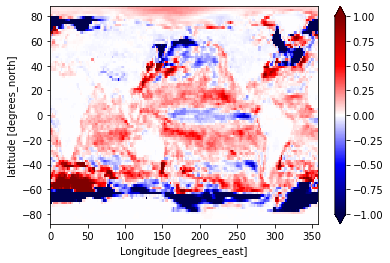

In [23]:
cov_surface_toa.plot(cmap='seismic', vmin=-1, vmax=1)

Text(0.5, 1.0, 'Control Covariance Between TOA and Surface Radiation')

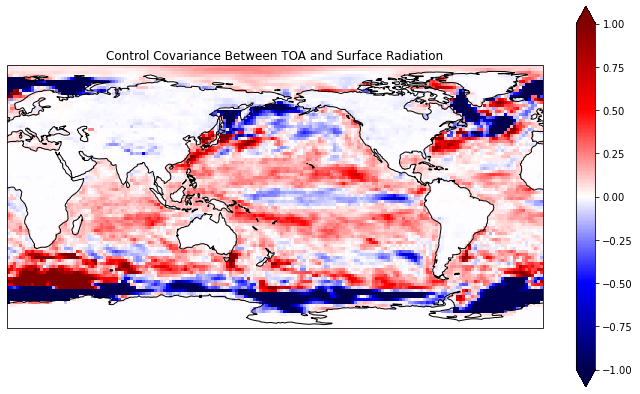

In [29]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_toa.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between TOA and Surface Radiation')

Text(0.5, 1.0, 'Control Covariance Between TOA and Surface Radiation')

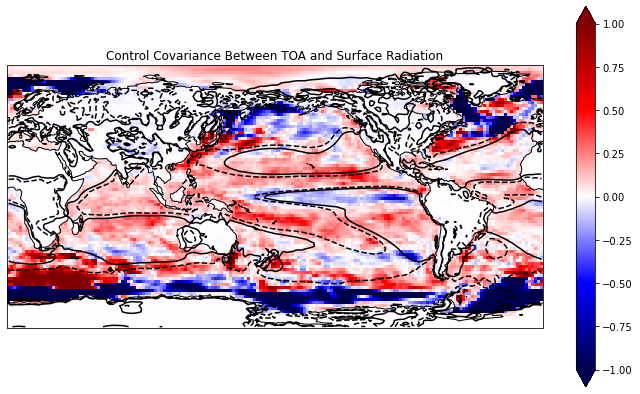

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_toa.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between TOA and Surface Radiation')

# Covariance Between TOA and Horiz

In [14]:
cov_toa_horiz = xr.cov(toa_cont_rolling, horiz_cont_rolling, dim='time')
cov_toa_horiz

<xarray.DataArray (name: 8, lat: 88, lon: 179)>
array([[[-0.24181016, -0.23703604, -0.23442665, ..., -0.24826259,
         -0.24539419, -0.24401193],
        [-0.27156003, -0.26459908, -0.26029261, ..., -0.29303354,
         -0.29080032, -0.28371136],
        [-0.32786693, -0.32027272, -0.31067221, ..., -0.36770044,
         -0.35757291, -0.34732927],
        ...,
        [-0.2034158 , -0.19379133, -0.20003122, ..., -0.10470854,
         -0.13761849, -0.17998517],
        [-0.21625879, -0.21818002, -0.22056874, ..., -0.16180081,
         -0.17793733, -0.19112321],
        [-0.15597589, -0.16295111, -0.15984979, ..., -0.12954289,
         -0.14442036, -0.15068455]],

       [[-0.26701542, -0.2668522 , -0.26318948, ..., -0.28161904,
         -0.27717138, -0.27417401],
        [-0.23926243, -0.23433667, -0.22638319, ..., -0.26321831,
         -0.25770792, -0.25222236],
        [-0.22849608, -0.21870218, -0.20976183, ..., -0.28345417,
         -0.26705039, -0.25206839],
...
        [-0.18747151, -0.19333056, -0.19391516, ..., -0.11786678,
         -0.13742219, -0.15768714],
        [-0.10393457, -0.09649625, -0.09255087, ..., -0.08964016,
         -0.09426918, -0.09889214],
        [-0.04574758, -0.04705296, -0.04842299, ..., -0.04076769,
         -0.04198075, -0.04321346]],

       [[-0.0317926 , -0.03099459, -0.03031035, ..., -0.03543997,
         -0.03445909, -0.03352437],
        [-0.04484   , -0.03980491, -0.03620434, ..., -0.05915064,
         -0.05542149, -0.05190183],
        [-0.09019127, -0.08205732, -0.07399489, ..., -0.11914802,
         -0.11167696, -0.10487533],
        ...,
        [-0.10023847, -0.07094376, -0.03038028, ..., -0.03952036,
         -0.04434164, -0.05508778],
        [-0.07774484, -0.08834577, -0.09140385, ..., -0.05992699,
         -0.06223188, -0.06438049],
        [-0.06695614, -0.06730542, -0.06772909, ..., -0.06503817,
         -0.06559497, -0.06610051]]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [15]:
cov_toa_horiz = cov_toa_horiz.mean('name')

Text(0.5, 1.0, 'Control Covariance Between TOA and Horizontal Radiation')

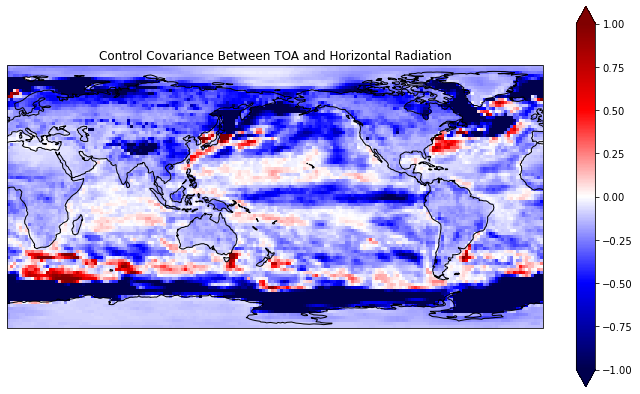

In [32]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_toa_horiz.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between TOA and Horizontal Radiation')

Text(0.5, 1.0, 'Control Covariance Between TOA and Horizontal Radiation')

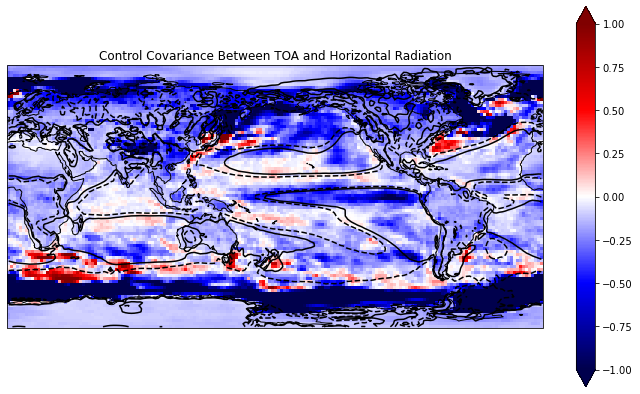

In [29]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_toa_horiz.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between TOA and Horizontal Radiation')

# Covariance Between TOA and Ocean Transport

In [16]:
cov_toa_ocean = xr.cov(toa_cont_rolling, ocean_cont_rolling, dim='time')
cov_toa_ocean = cov_toa_ocean.mean('name')

Text(0.5, 1.0, 'Control Covariance Between TOA and Ocean Radiation')

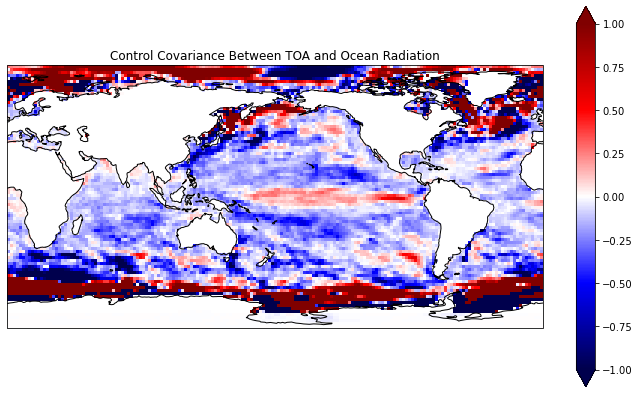

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_toa_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between TOA and Ocean Radiation')

Text(0.5, 1.0, 'Control Covariance Between TOA and Ocean Radiation')

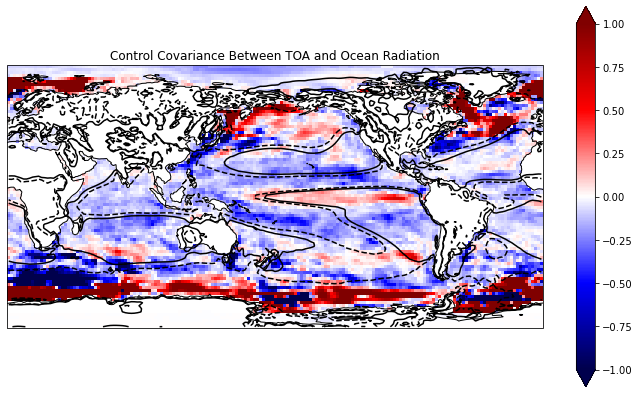

In [30]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_toa_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between TOA and Ocean Radiation')

# Covariance Between Surface and Horiz Radiation

In [17]:
cov_surface_horiz = xr.cov(surface_cont_rolling, horiz_cont_rolling, dim='time')
cov_surface_horiz = cov_surface_horiz.mean('name')

Text(0.5, 1.0, 'Control Covariance Between Surface and Horiz Radiation')

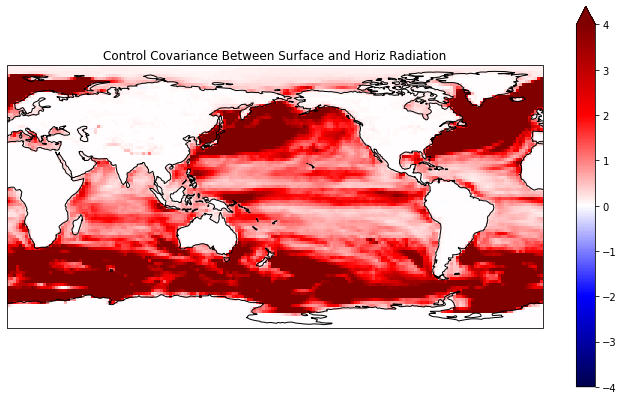

In [87]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_horiz.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=4, vmin=-4)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between Surface and Horiz Radiation')

Text(0.5, 1.0, 'Control Covariance Between Surface and Horiz Radiation')

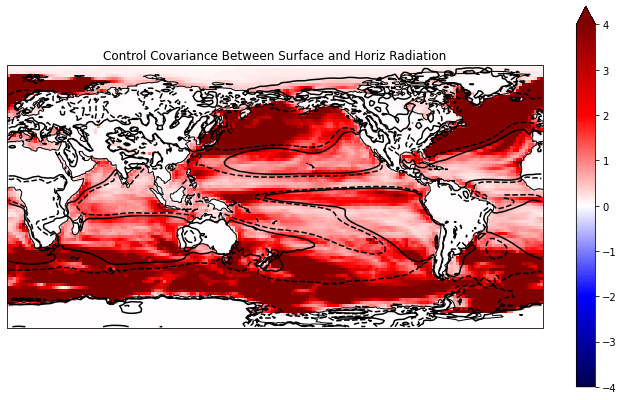

In [31]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_horiz.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=4, vmin=-4)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between Surface and Horiz Radiation')

# Covariance Between Surface and Ocean Radiation

In [18]:
cov_surface_ocean = xr.cov(surface_cont_rolling, ocean_cont_rolling, dim='time')
cov_surface_ocean = cov_surface_ocean.mean('name')

Text(0.5, 1.0, 'Control Covariance Between Surface and Ocean Radiation')

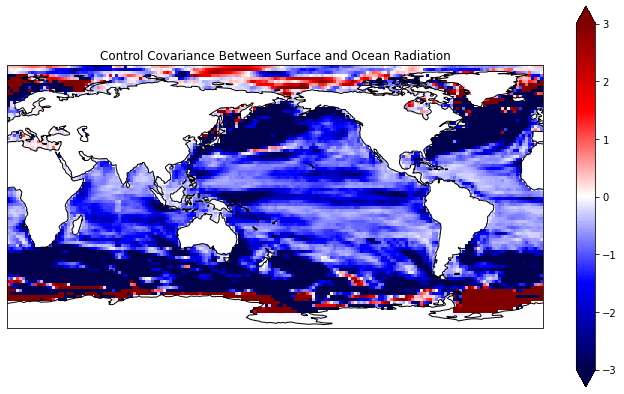

In [59]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=3, vmin=-3)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between Surface and Ocean Radiation')

Text(0.5, 1.0, 'Control Covariance Between Surface and Ocean Radiation')

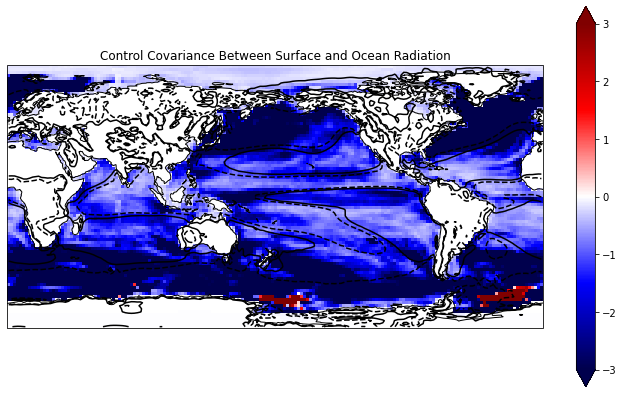

In [32]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_surface_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=3, vmin=-3)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between Surface and Ocean Radiation')

# Covariance Between Horiz and Ocean Radiation

In [19]:
cov_horiz_ocean = xr.cov(horiz_cont_rolling, ocean_cont_rolling, dim='time')
cov_horiz_ocean = cov_horiz_ocean.mean('name')

Text(0.5, 1.0, 'Control Covariance Between Horiz and Ocean Radiation')

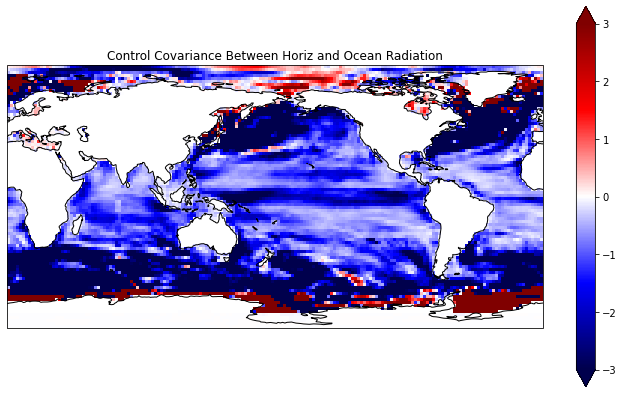

In [58]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_horiz_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=3, vmin=-3)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between Horiz and Ocean Radiation')

Text(0.5, 1.0, 'Control Covariance Between Horiz and Ocean Radiation')

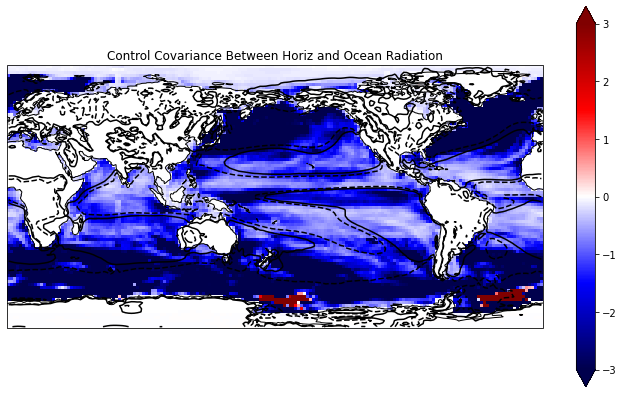

In [33]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_horiz_ocean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=3, vmin=-3)
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#000000', levels=[-0.005,0.005])
plt.title('Control Covariance Between Horiz and Ocean Radiation')

# Testing Reversing the Order...

In [104]:
cov_ocean_horiz = xr.cov(ocean_cont_rolling, horiz_cont_rolling, dim='time')
cov_ocean_horiz = cov_ocean_horiz.mean('name')

Text(0.5, 1.0, 'Control Covariance Between Ocean and Horiz Radiation')

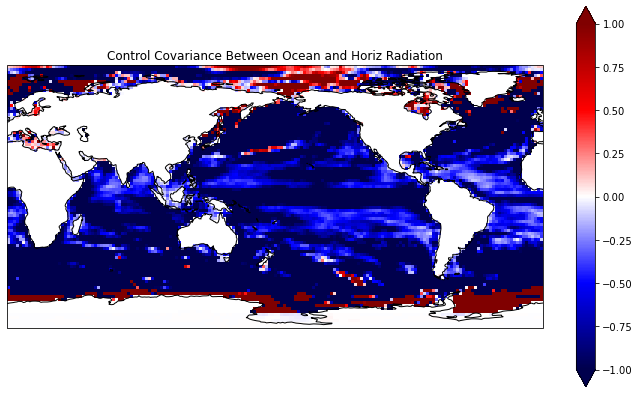

In [21]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cov_ocean_horiz.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmax=1, vmin=-1)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Covariance Between Ocean and Horiz Radiation')

#Same results

# Variance

In [20]:
var_toa = toa_cont_rolling.std('time')
var_toa = var_toa.mean('name')

In [21]:
var_surface = surface_cont_rolling.std('time')
var_surface = var_surface.mean('name')

In [22]:
var_horiz = horiz_cont_rolling.std('time')
var_horiz = var_horiz.mean('name')

In [23]:
var_ocean = ocean_cont_rolling.std('time')
var_ocean = var_ocean.mean('name')

# All on one plot

In [24]:
def plot(array,row,col,cmap,vmin,vmax):
    """
    For plotting covariance
    """
    ax = plt.subplot(gs[row,col], projection=ccrs.PlateCarree(central_longitude=180))
    mappable = array.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False)
    ax.coastlines(color='black', linewidth=1)
    return mappable

Text(0.5, 0, 'Covariance')

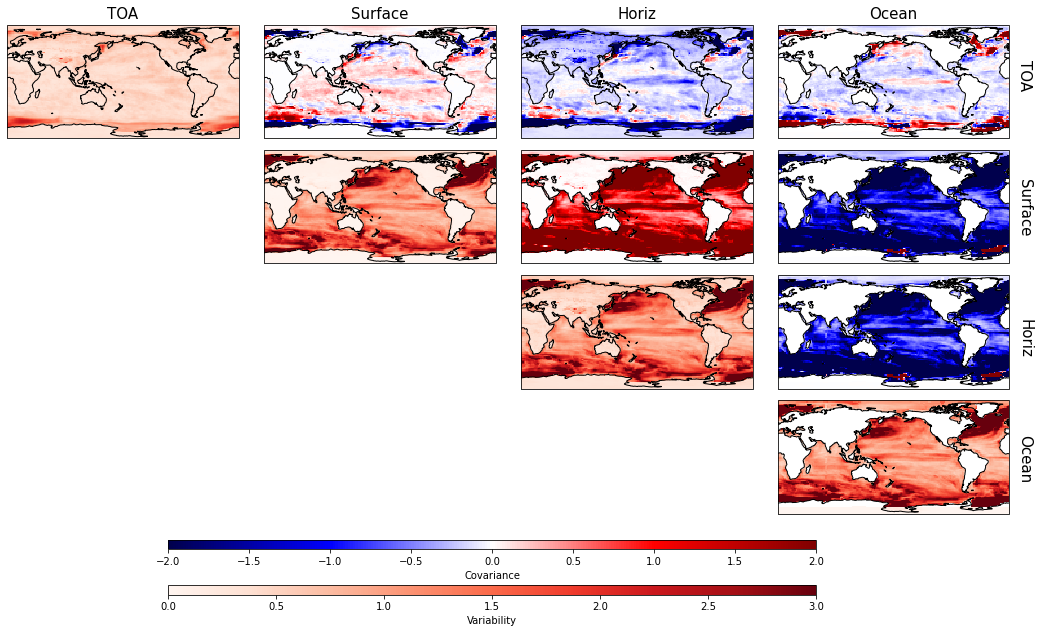

In [25]:
nrow = 4
ncol = 4
matplotlib.rcParams['figure.figsize'] = [18,9]
fig = plt.figure(figsize=(18,9))

gs = gridspec.GridSpec(4,4)
gs.update(wspace=0.1,hspace=0.1)

vmin=-2
vmax=2
cmap='seismic'

plot(var_toa,0,0,'Reds',0,3)
plt.title('TOA',fontsize=15)

plot(cov_surface_toa,0,1,cmap,vmin,vmax)
plt.title('Surface',fontsize=15)

plot(cov_toa_horiz,0,2,cmap,vmin,vmax)
plt.title('Horiz',fontsize=15)

plot(cov_toa_ocean,0,3,cmap,vmin,vmax)
plt.title('Ocean',fontsize=15)
plt.text(190,-10,'TOA',rotation=270,fontsize=15)

plot(var_surface,1,1,'Reds',0,3)

plot(cov_surface_horiz,1,2,cmap,vmin,vmax)

plot(cov_surface_ocean,1,3,cmap,vmin,vmax)
plt.text(190,-40,'Surface',rotation=270,fontsize=15)

plot(var_horiz,2,2,'Reds',0,3)

map_cov = plot(cov_horiz_ocean,2,3,cmap,vmin,vmax)
plt.text(190,-35,'Horiz',rotation=270,fontsize=15)

map_var = plot(var_ocean,3,3,'Reds',0,3)
plt.text(190,-35,'Ocean',rotation=270,fontsize=15)

cax_var = fig.add_axes([0.25,0,0.5,0.015])
cbar_var = fig.colorbar(map_var, cax=cax_var, orientation='horizontal')
cbar_var.ax.set_xlabel('Variability')

cax_cov = fig.add_axes([0.25,0.07,0.5,0.015])
cbar_cov = fig.colorbar(map_cov, cax=cax_cov, orientation='horizontal')
cbar_cov.ax.set_xlabel('Covariance')

# Testing adding covariances and variances

In [ ]:
var_ocean_add = var_toa + var_surface + var_